In [290]:
from skimage.filters import threshold_local, threshold_local, try_all_threshold, sobel, gaussian
from skimage import color,data,io, exposure, measure
from skimage.feature import canny, corner_harris
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

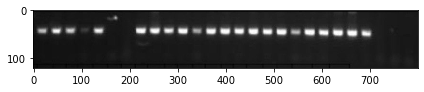

In [224]:
#Loading the image
img = io.imread('crop1.jpeg', as_gray=True)
io.imshow(img)

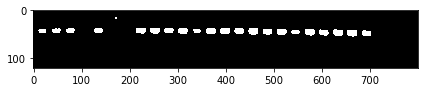

In [225]:
#Setting a global threshold, optimal
threshold = threshold_otsu(img)
binaryy = img > threshold
io.imshow(binaryy)

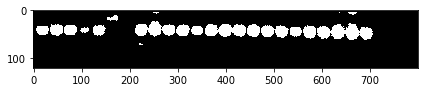

In [253]:
#Localthresholding
block_size = 1001
thresh_local = threshold_local(img, block_size, offset = 0)
binary = img > thresh_local
io.imshow(binary)

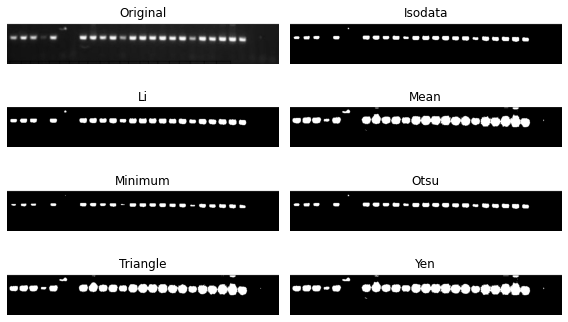

In [227]:
#Try all thresholding
fig, ax = try_all_threshold(img, verbose = False)
plt.show()

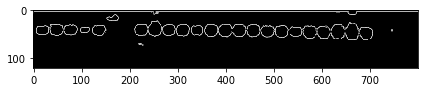

In [228]:
#Edge detection on thresholded image, setting boundaries around objects
sobel_img  = sobel(binary)
io.imshow(sobel_img)

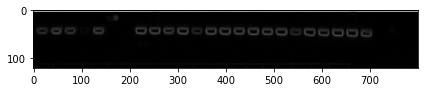

In [203]:
#Edging on normal image
sobel_imgg  = sobel(img)
io.imshow(sobel_img)

/var/folders/xt/vnsmrzxs2xgfqfqkv7q92s0h0000gn/T/ipykernel_3968/2466956299.py:1: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gaussian_img = gaussian(img, multichannel = False)


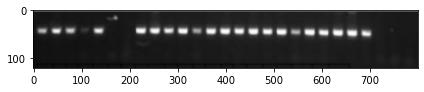

In [196]:
#Smoothing an image
gaussian_img = gaussian(img, multichannel = False)
io.imshow(gaussian_img)

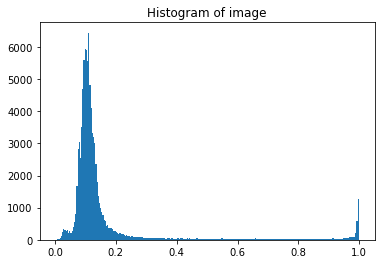

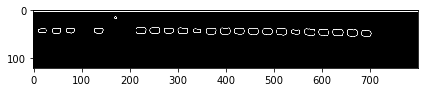

In [212]:
#Contrasting an image
plt.title('Histogram of image')
plt.hist(img.ravel(), bins=256)
plt.show()
xray_image_eq =  exposure.equalize_adapthist(sobel_img, clip_limit = 0.8)
io.imshow(xray_image_eq)

In [266]:
contours = measure.find_contours(binaryy, 0.1)
for contour in contours:
    print(contour.shape)
    # Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 100

# Count dots in contours excluding bigger than band size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

number_of_wells = 96
# Shows all contours found 
#show_image_contour(binaryy, contours)

# Print the dice's number
print("Band number: {}. ".format(len(dots_contours)))
print("Number of wells abscent: {}. ".format(number_of_wells - len(dots_contours)))

(800, 2)
(17, 2)
(67, 2)
(65, 2)
(67, 2)
(71, 2)
(61, 2)
(57, 2)
(59, 2)
(59, 2)
(67, 2)
(67, 2)
(69, 2)
(51, 2)
(49, 2)
(65, 2)
(69, 2)
(73, 2)
(71, 2)
(71, 2)
(55, 2)
(73, 2)
(65, 2)
Band number: 22. 
Number of wells abscent: 74. 


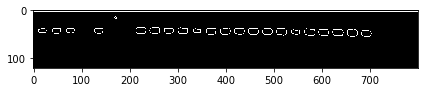

In [288]:
edging = canny(binaryy, sigma = 0.001)
io.imshow(edging)